# Event rates at the ILC
We expect an average of one hadronic Z event per _bunch train_ at the ILC.
Bunch trains come in 1316 bunches, every 200 ms

In [1]:
const nb_train = 1316
const ntrain_second = 5
const nb_second = nb_train * ntrain_second
const lumi = 1.6 # x 1E34 / cm2 / s

1.6

## Hadronic Z cross section

From: https://arxiv.org/pdf/1604.07524.pdf
- relevant background cross section: 157 pb
- 1 pb = 1E-36 cm2
- background = 157E-36 cm2 = 1.57E-34 cm2
--> 1.57 * 1.6 events / s = 2.512 events / s

## Events per collision
The number of events per second is ~2.5. We have `nb_second = 6580` bunch crossings in every second. Considering the number of bunches, this is a uniform distribution.

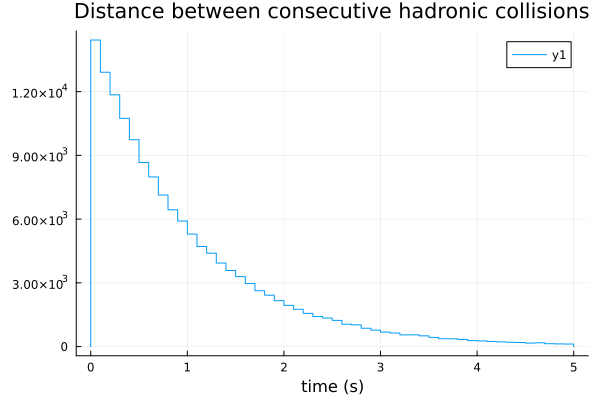

In [2]:
using Random
using Plots
rng = MersenneTwister(777)
const prob_bunch = 1 / 6580
const NBUNCHES = 1000000000
# let's make 1B bunches and have them produce hadronic interactions
bunchIDs = randsubseq(rng, 1:NBUNCHES, prob_bunch)
# we can plot the distance between two hadronic collisions
stephist(diff(bunchIDs)/ nb_second, bins=0:0.1:5)
xlabel!("time (s)")
title!("Distance between consecutive hadronic collisions")

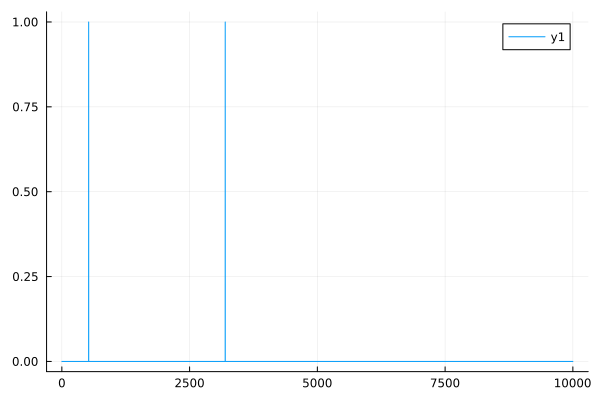

In [3]:
x = zeros(NBUNCHES)
x[bunchIDs] .= 1
plot(x[1:10000])

## Events per train
Now we group the bunches into trains.

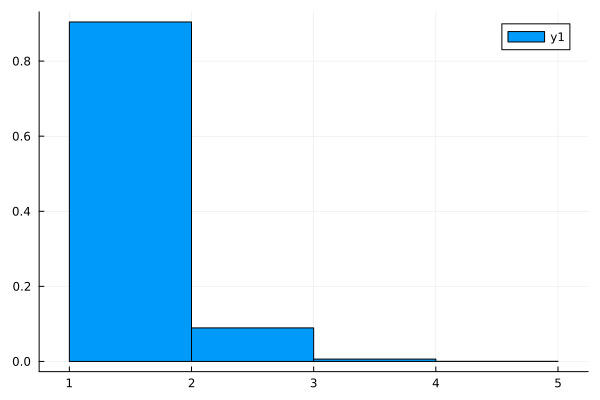

In [4]:
using StatsBase
# the train ID is given by just bunchID div nb_train
trainIDs = div.(bunchIDs, nb_train)
# we can count how many times a trainID shows up
cmap = countmap(trainIDs)
# then we can plot a histogram of the relative occurence of the same trainID
histogram([c for (i, c) in cmap], bins=1:5, norm=true)

## Notes
This still ignores the fact that events could happen *in the same bunch*